# 5-PCA用于面部数据

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

In [4]:
# support functions ---------------------------------------
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


# PCA functions ---------------------------------------
def covariance_matrix(X):
    """
    Args:
        X (ndarray) (m, n)
    Return:
        cov_mat (ndarray) (n, n):
            covariance matrix of X
    """
    m = X.shape[0]

    return (X.T @ X) / m


def normalize(X):
    """
        for each column, X-mean / std
    """
    X_copy = X.copy()
    m, n = X_copy.shape

    for col in range(n):
        X_copy[:, col] = (X_copy[:, col] - X_copy[:, col].mean()) / X_copy[:, col].std()

    return X_copy


def pca(X):
    """
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
    Args:
        X ndarray(m, n)
    Returns:
        U ndarray(n, n): principle components
    """
    # 1. normalize data
    X_norm = normalize(X)

    # 2. calculate covariance matrix
    Sigma = covariance_matrix(X_norm)  # (n, n)

    # 3. do singular value decomposition
    # remeber, we feed cov matrix in SVD, since the cov matrix is symmetry
    # left sigular vector and right singular vector is the same, which means
    # U is V, so we could use either one to do dim reduction
    U, S, V = np.linalg.svd(Sigma)  # U: principle components (n, n)

    return U, S, V


def project_data(X, U, k):
    """
    Args:
        U (ndarray) (n, n)
    Return:
        projected X (n dim) at k dim
    """
    m, n = X.shape

    if k > n:
        raise ValueError('k should be lower dimension of n')

    return X @ U[:, :k]


def recover_data(Z, U):
    m, n = Z.shape

    if n >= U.shape[0]:
        raise ValueError('Z dimension is >= U, you should recover from lower dimension to higher')

    return Z @ U[:, :n].T


you do this to rotate the face clockwise 90 degree, I don't know why every pic I got from .mat file is in wrong orientation

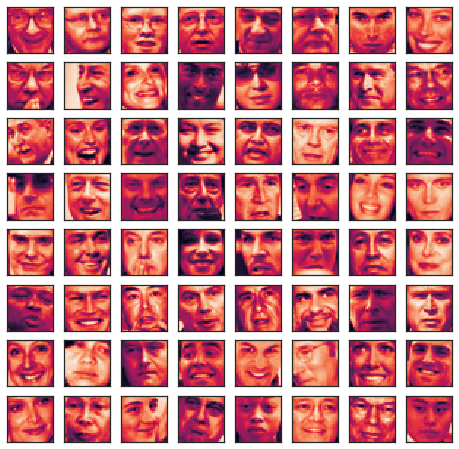

In [5]:
plot_n_image(X, n=64)
plt.show()

# run PCA, find principle components

In [6]:
U, _, _ = pca(X)

In [7]:
U.shape

(1024, 1024)

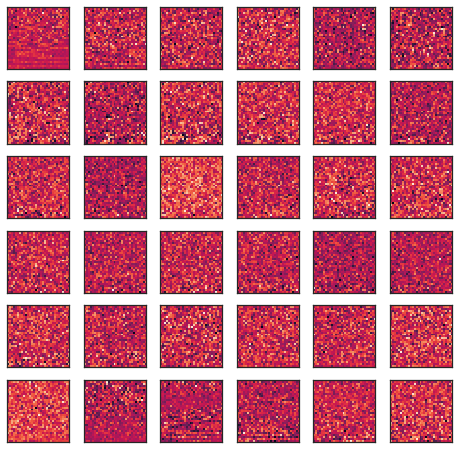

In [8]:
# didn't see face in principle components 
plot_n_image(U, n=36)
plt.show()


I don't see face here...

# reduce dimension to `k=100`

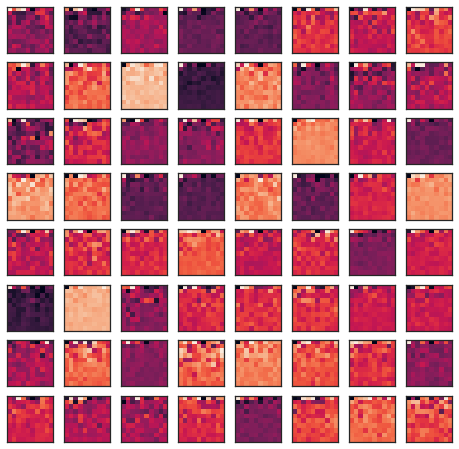

In [9]:
# no face in projected dimension too
Z = project_data(X, U, k=100)
plot_n_image(Z, n=64)
plt.show()

# recover from `k=100`
you lost some detail, but.. they are strikingly similar

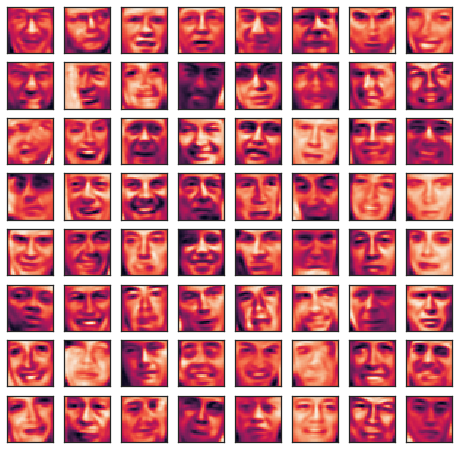

In [10]:
X_recover = recover_data(Z, U)
plot_n_image(X_recover, n=64)
plt.show()

# sklearn PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
sk_pca = PCA(n_components=100)

In [13]:
Z = sk_pca.fit_transform(X)
Z.shape

(5000, 100)

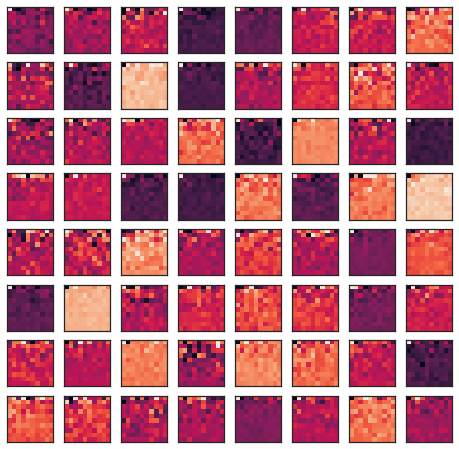

In [14]:
plot_n_image(Z, 64)
plt.show()

In [15]:
X_recover = sk_pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

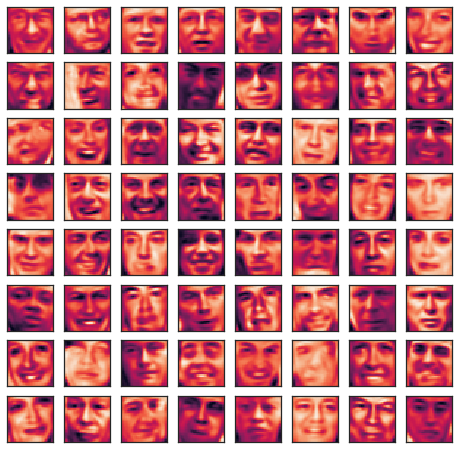

In [16]:
plot_n_image(X_recover, n=64)
plt.show()